In [1]:
## Fake news classification using Spacy word embeddings

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-news-classification/WELFake_Dataset.csv


In [3]:
import pandas as pd

df = pd.read_csv('/kaggle/input/fake-news-classification/WELFake_Dataset.csv')

In [4]:
df.head(5)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [5]:
df.shape

(72134, 4)

In [6]:
df = df.drop(columns = 'Unnamed: 0')

In [7]:
df

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...
72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [8]:
df.columns

Index(['title', 'text', 'label'], dtype='object')

In [9]:
df.isna().sum()

title    558
text      39
label      0
dtype: int64

### lets drop the columns with na values

In [10]:
df = df.dropna()


In [11]:
df.isna().sum()

title    0
text     0
label    0
dtype: int64

In [12]:
df.shape

(71537, 3)

<Axes: ylabel='count'>

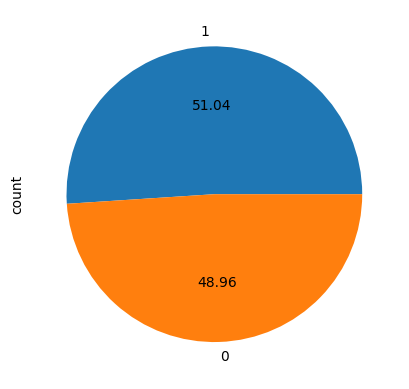

In [13]:
df['label'].value_counts().plot.pie(autopct='%.2f')

In [14]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [15]:
df = df.sample(frac=0.2, random_state=42)

In [16]:
df['vector'] = df['text'].apply(lambda text: nlp(text).vector)  

In [17]:
df.head()

,title,text,label,vector
54359,Live at Truthdig: Robert Scheer and Thomas Fra...,Live at Truthdig: Robert Scheer and Thomas Fra...,1,"[-0.63581425, -0.8257329, -1.8487172, 0.269365..."
6993,The Mirage of a Return to Manufacturing Greatn...,"Half a century ago, harvesting California’s 2....",0,"[-1.7277366, 0.5311084, -2.1067424, 0.5243744,..."
28912,British PM expected to offer to fill post-Brex...,(Reuters) - The British government has told Ge...,0,"[-1.6683221, -0.2753841, -1.001579, 0.51330703..."
65965,Checkmating Obama,Originally published by the Jerusalem Post . \...,1,"[-1.6367522, 1.5710906, -2.4941018, 0.41259968..."
2307,Thirty-eight injured in police charges in Cata...,MADRID (Reuters) - Emergency services have att...,0,"[-2.8425553, -0.22453366, -1.5271686, 1.591209..."


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.vector.values,
    df.label,
    test_size = 0.2,
    random_state = 2024
)

In [19]:


import numpy as np

X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)



In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler


In [21]:

scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)

In [24]:


clf = MultinomialNB()
clf.fit(scaled_train_embed, y_train)

MultinomialNB()

In [26]:

from sklearn.metrics import classification_report
y_pred = clf.predict(scaled_test_embed)

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.73      0.85      0.79      1394
           1       0.83      0.71      0.76      1468

    accuracy                           0.77      2862
   macro avg       0.78      0.78      0.77      2862
weighted avg       0.78      0.77      0.77      2862



In [27]:


from  sklearn.neighbors import KNeighborsClassifier

#1. creating a KNN model object
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)

#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)

#4. print the classfication report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1394
           1       0.92      0.88      0.90      1468

    accuracy                           0.90      2862
   macro avg       0.90      0.90      0.90      2862
weighted avg       0.90      0.90      0.90      2862



Text(95.72222222222221, 0.5, 'Truth')

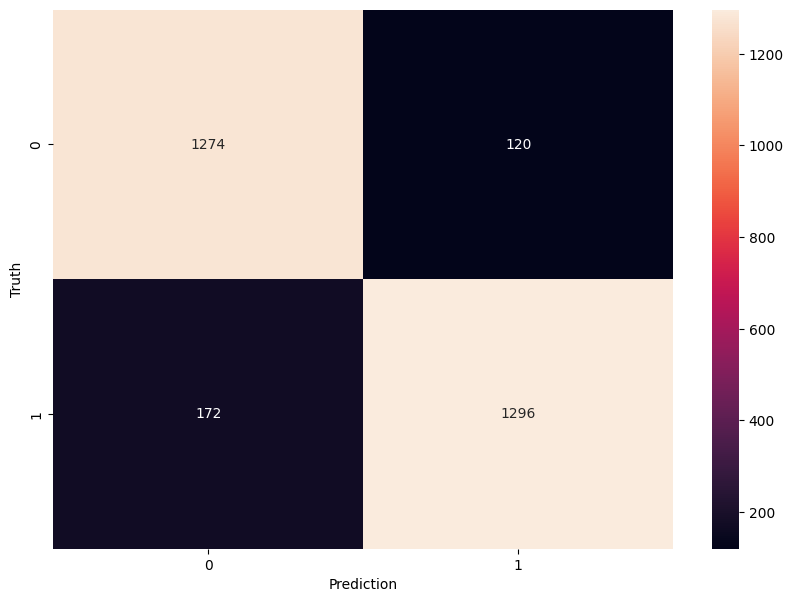

In [28]:
#finally print the confusion matrix for the best model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')